In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

fp = "cmems_mod_glo_phy_anfc_merged-uv_PT1H-i_1770985217793.nc"
ds = xr.open_dataset(fp, decode_times=True)

# Extract horizontal and vertical currents 
u = ds["utotal"].isel(depth=0)   # eastward (m/s)
v = ds["vtotal"].isel(depth=0)   # northward (m/s)
speed = np.hypot(u, v)

print(ds)
print(u.attrs, v.attrs)


<xarray.Dataset> Size: 286MB
Dimensions:    (time: 1045, depth: 1, latitude: 111, longitude: 77)
Coordinates:
  * time       (time) datetime64[ns] 8kB 2026-01-01 ... 2026-02-13T12:00:00
  * depth      (depth) float32 4B 0.494
  * latitude   (latitude) float32 444B 34.75 34.83 34.92 ... 43.75 43.83 43.92
  * longitude  (longitude) float32 308B -13.83 -13.75 -13.67 ... -7.583 -7.5
Data variables:
    uo         (time, depth, latitude, longitude) float32 36MB ...
    utide      (time, depth, latitude, longitude) float32 36MB ...
    utotal     (time, depth, latitude, longitude) float32 36MB ...
    vo         (time, depth, latitude, longitude) float32 36MB ...
    vsdx       (time, depth, latitude, longitude) float32 36MB ...
    vsdy       (time, depth, latitude, longitude) float32 36MB ...
    vtide      (time, depth, latitude, longitude) float32 36MB ...
    vtotal     (time, depth, latitude, longitude) float32 36MB ...
Attributes:
    Conventions:       CF-1.11
    title:             

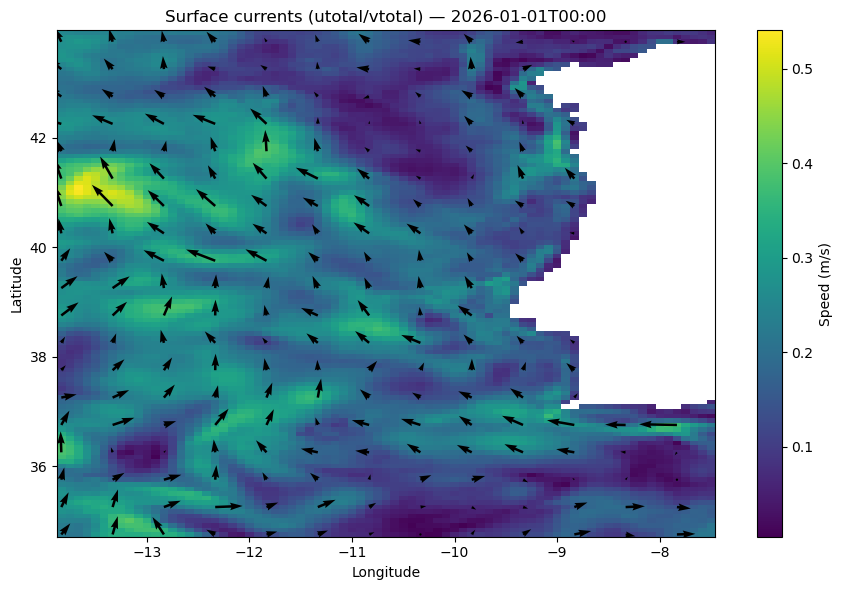

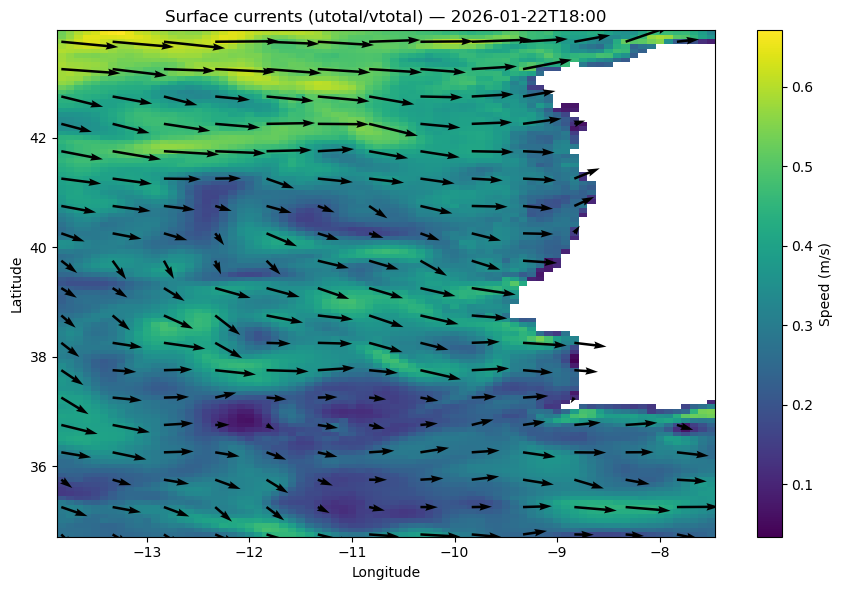

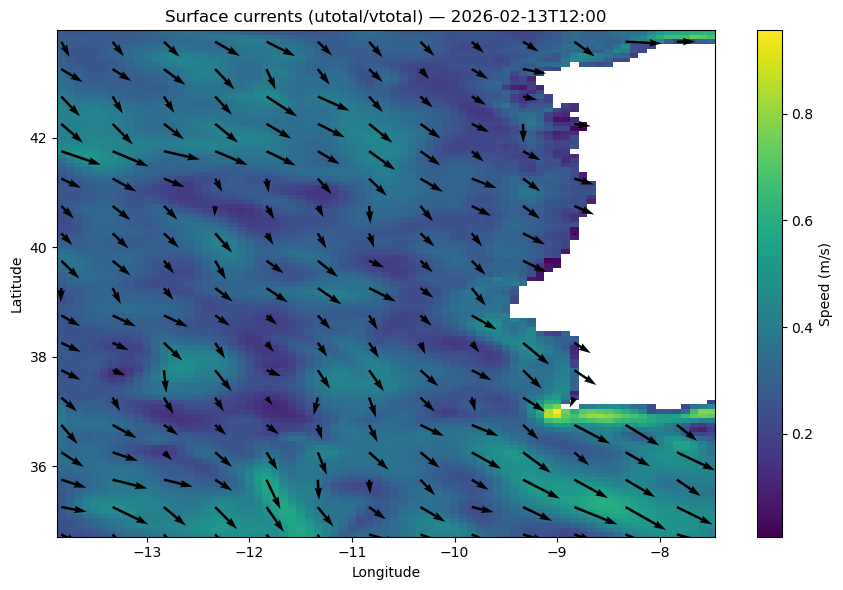

In [3]:
def plot_currents(t_index, stride=6):
    ti = ds.time.values[t_index]

    uu = u.isel(time=t_index)
    vv = v.isel(time=t_index)
    ss = speed.isel(time=t_index)

    # Subsample for quiver so arrows aren't too dense
    uu_q = uu.isel(latitude=slice(None, None, stride),
                   longitude=slice(None, None, stride))
    vv_q = vv.isel(latitude=slice(None, None, stride),
                   longitude=slice(None, None, stride))

    lon2d, lat2d = np.meshgrid(uu.longitude.values, uu.latitude.values)
    lon2d_q, lat2d_q = np.meshgrid(uu_q.longitude.values, uu_q.latitude.values)

    plt.figure(figsize=(9,6))
    plt.pcolormesh(lon2d, lat2d, ss.values, shading="auto")
    plt.colorbar(label="Speed (m/s)")
    plt.quiver(lon2d_q, lat2d_q, uu_q.values, vv_q.values,
               angles="xy", scale_units="xy", scale=1)
    plt.title(f"Surface currents (utotal/vtotal) — {np.datetime_as_string(ti, unit='m')}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.tight_layout()
    plt.show()

# Example timesteps: first / middle / last
plot_currents(0)
plot_currents(len(ds.time)//2)
plot_currents(len(ds.time)-1)
